In [1]:
from google.colab import files  
import zipfile

# Importing Modules
import numpy as np
import pandas as pd
import io
import os
import re
from keras.preprocessing import sequence
from keras.models import Sequential
import numpy as np
from keras.layers import Flatten,Masking
from keras.layers.recurrent import LSTM
from keras.layers.core import Activation
from keras.layers.wrappers import TimeDistributed 
from keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from sklearn.cross_validation import train_test_split
from keras.layers import Merge ,  Bidirectional , Dense
from keras.backend import tf
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB




class GoogleColabHelper():

  def __init__(self):
    print 'Initializing Google Helper : '
    print 'Helper Functions That you can use : '
    print '---------------------------------------------------------------------'
    print 'To Upload Files from local system to colab : - UploadFilesFromLocal()'
    print '---------------------------------------------------------------------'
    print 'To Download Files                          : - downloadFile(path)'
    print '---------------------------------------------------------------------'
    print 'Getting Data From URL                      : - getDataFromUrl(url)'
    print '---------------------------------------------------------------------'
    print 'Unzip                                      : - Unzip(path , directory)'
    print '---------------------------------------------------------------------'
    print 'Download and Install Glove                 : - DownAndInstallGlove(directory)'
    print '---------------------------------------------------------------------'


  ## Uploading files from Local  
  def UploadFilesFromLocal(self):
    global files
    uploaded = files.upload()
    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
    
  ## Downloading the file  
  def downloadFile(self,path):
    global files
    files.download(path)
  
  ## Getting data from URL
  def getDataFromUrl(self , url):
    print "Getting Data From Url"
    os.system('wget ' + str(url))
    print "Done !!"
    os.system('ls')
  
  ## Unzipping the file
  def Unzip(self , path , directory):
    zip_ref = zipfile.ZipFile(path, 'r')
    zip_ref.extractall(directory)
    zip_ref.close()  
    print('Done!!')
    os.system('ls')
    
  ## Download and Install Glove  
  def DownAndInstallGlove(self , directory):
    curr = !ls
    print("Current Directory : \n" + str(curr))
    print("---------------------------Downloading : ")
    !wget = 'http://nlp.stanford.edu/data/glove.6B.zip'
    print("---------------------------Extracting : ")
    zip_ref = zipfile.ZipFile('./glove.6B.zip', 'r')
    zip_ref.extractall(directory)
    zip_ref.close()
    print "Done !!!"
    os.system('ls')
    
    
    
#################################### Neural Network ####################################################    
    
class NN:
    def __init__(self):
      print 'Model Initialized :)' 
      self.model = Sequential()

    #input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
    #output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
    #input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.
    def EmbeddingLayer(self,input_dim,emb_dim,input_len = None):
        print('Input Dimension : ' + str(input_dim))
        print('Embedding Dimension : ' + str(emb_dim))
        print('Input Length : ' + str(input_len))
        self.model.add(Embedding(input_dim,emb_dim,input_length=input_len))
        print('Embedd Success')
        
    def Conv1D(self,n_filters,kernel,padding = 'valid'):
      self.model.add(Convolution1D(n_filters,kernel,padding = padding))
        
    # Flattening
    def Flatten(self):
      self.model.add(Flatten())
        
    # Input Layer
    def InputLayer(self,input_dim,output,activation):
      self.model.add(Dense(output, input_dim=input_dim,activation=activation,kernel_initializer='normal'))
      
      
    # Hidden Layer    
    def HiddenLayer(self,output,activation):
        self.model.add(Dense(output,activation=activation,kernel_initializer='normal'))
                    
    # Output Layer                   
    def Output(self,output,activation):
        self.model.add(Dense(output,activation=activation,kernel_initializer='normal'))
    
    def Compile(self,loss,opt,metr):
        self.model.compile(loss = loss , optimizer = opt , metrics = [metr]) 
        print("Successfully Compiled")
                        
    def modelSummary(self):
        print("Model Summary \n")
        print(self.model.summary())   
        
    def FitTrain(self , x_train , y_train , batch_size , epochs):
        self.model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs)
        
    def Predictions(self,x_test):
        return self.model.predict(x_test)
    
    def LSTM(self,output,return_sequences = False , drop_out = None):
        self.model.add(LSTM(output ,return_sequences = return_sequences , dropout = drop_out))
        
    def Tokenizer(self , max_features ,data,split = ' '):
        self.tokenizer = Tokenizer(num_words=max_features, split=split)
        self.tokenizer.fit_on_texts(data)
    
    def PadSequences(self,data):
        X = self.tokenizer.texts_to_sequences(data)
        #print ("Pad Seq. X : " + str(X))
        X = pad_sequences(X)
        return X    
      

########################## Machine Learning ###########################################      
      
def is_categorical(array_like):
  return array_like.dtype.name == 'object'  

class MachineLearning():
  
  def __init__(self,dataset):
    self.dataset = dataset
    print ('Functions : ')
    print '----------------------------------------------------'
    print 'For taking the updated dataset        : getDataSet()'
    print '----------------------------------------------------'
    print 'For Checking Null Percentage          : checkCounts()'
    print '----------------------------------------------------'
    print 'For checking Null Values              : checkNull()'
    print '----------------------------------------------------'
    print 'For Getting Out Unique Values         : uniqueValues(column)'
    print '----------------------------------------------------'
    print 'For drawing bargraph distribution     : drawDistribution(column)'
    print '----------------------------------------------------'
    print 'Label Encoding                        : LabelEncoder(X)'
    print '----------------------------------------------------'
    print 'Filling Null Values without Imputer   : FillNA(cols , filling_data)'
    print '----------------------------------------------------'
    print 'Filling Null Values with Imputer      : FillNAImputer(strategy , X)'
    print '----------------------------------------------------'
    print 'Train and Test Splitting              : traintestSplit(X , y)'
    print '----------------------------------------------------'
    print 'XGBoost                               : XGBoost(X_train , y_train)'
    print '----------------------------------------------------'
    print 'SVM                                   : SVM(X_train , y_train)'
    print '----------------------------------------------------'
    print 'GaussianNB                            : GaussianNB(X_train,y_train)'
    print '----------------------------------------------------'
    print 'CheckAccuracy                         : CheckAccuracy(X_test , y_test)'
    print '----------------------------------------------------'
    print 'ConfusianMatrix                       : ConfusianMatrix(y_test , y_pred)'
    
    
  
  def getDataSet(self):
    return self.dataset
  
  def checkCounts(self): 
    for i in self.dataset.columns:
      if(is_categorical(self.dataset[i])):   
        print 'Info of Column : ' + str(i)
        counts_without_null = self.dataset[i].value_counts().sum()
        null_counts = self.dataset[i].isnull().sum()
        print 'Counts Without Null : '
        print self.dataset[i].value_counts()
        print 'Null Counts  : '
        print null_counts
        print 'Null Percentage : ' + str(float((float(null_counts)/float(null_counts + counts_without_null)) * 100))
        print '------------------------------------------------------------'
      
  
  
  def checkNull(self):
    print self.dataset.isnull().sum()
    
    
  def uniqueValues(self , cols):
    print 'Unique Values of Column ' + str(cols) + ' :'
    print set(self.dataset[cols].values)
    print '-------------------------------------------'
    
    
  def drawDistribution(self , cols):
    print 'Drawing Distribution of Column ' + str(cols) + ' :'
    print  self.dataset[cols].value_counts().plot.bar()
    print '---------------------------------------------'
    
  def LabelEncoder(self , X):
    print 'Label Encoding Starts :'
    le = preprocessing.LabelEncoder()
    tranformed_x = le.fit_transform(X)
    print 'Classes : '
    print le.classes_
    print '---------------------------------------------'
    return tranformed_x
   
  
  def FillNA(self , cols , filling_data):
    self.dataset[cols] = self.dataset[cols].fillna(filling_data)
    print 'Done !!'
  
  def FillNAImputer(self , strategy , X):
    imputer = preprocessing.Imputer(strategy = strategy)
    X = imputer.fit_transform(X)
    print 'Done !'
    return X   
  
  
  def traintestSplit(self,X,y,test_size = 0.2 ,rs = 0):
    print 'Test Size : ' + str(test_size) + ' Random State : ' + str(rs)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    print 'Done!!'
    return (X_train , X_test , y_train , y_test)
  
  
  def XGBoost(self , X_train , y_train , max_depth = 3 , n_estimators = 100):
    classifier = XGBClassifier(max_depth = max_depth , n_estimators = n_estimators)
    classifier.fit(X_train,y_train)
    self.classifier = classifier
    print 'Done!!'
    return classifier
  
  def SVM(self,X_train,y_train,kernel,rs):
    self.classifier = SVC(kernel = kernel ,random_state = rs)
    self.classifier.fit(X_train,y_train)
    print 'Done !!'
    return self.classifier        
        
  def GaussianNB(self,X_train,y_train):
    self.classifier = GaussianNB()
    self.classifier.fit(X_train,y_train)
    print 'Done !!'
    return self.classifier
  
  def ConfusionMatrix(self,y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print ("Confusion Matrix : \n" + str(cm))
    total = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
    accurate = cm[0][0] + cm[1][1]
    print ("Accuracy : " + str(int(float(accurate/float(total))*100)))  
  
  
  def CheckAccuracy(self , X_test , y_test):
    y_pred = self.classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print cm
    print 'Accuracy : '
    correct = cm[0][0] + cm[1][1]
    total = cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]
    print str(float((float(correct) / float(total)) * 100))
    print '--------------------------------------------------' 
    return y_pred
  
  
  def NeuralNetwork(self , X_Train , y_train ,X_Test,y_test, batch_size ,  epochs):
    n = NN()
    n.InputLayer(15 , 10 , 'relu')
    n.HiddenLayer(5 , 'relu')
    n.Output(1 , 'sigmoid')
    n.Compile('binary_crossentropy' , 'adam' , 'accuracy')
    n.modelSummary()
    print 'Batch Size : ' + str(batch_size) + ' Epochs : ' + str(epochs)
    n.FitTrain(X_train,y_train,batch_size,epochs)
    y_pred = n.Predictions(X_Test) > 0.5
    self.ConfusionMatrix(y_test , y_pred)
    return (n,y_pred)      

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
helper = GoogleColabHelper()

Initializing Google Helper : 
Helper Functions That you can use : 
---------------------------------------------------------------------
To Upload Files from local system to colab : - UploadFilesFromLocal()
---------------------------------------------------------------------
To Download Files                          : - downloadFile(path)
---------------------------------------------------------------------
Getting Data From URL                      : - getDataFromUrl(url)
---------------------------------------------------------------------
Unzip                                      : - Unzip(path , directory)
---------------------------------------------------------------------
Download and Install Glove                 : - DownAndInstallGlove(directory)
---------------------------------------------------------------------


In [3]:
helper.getDataFromUrl('http://hck.re/64FQ44')

Getting Data From Url
Done !!


In [5]:
helper.Unzip('64FQ44' , './')

Done!!


In [0]:
import pandas as pd
import numpy as np

In [7]:
train = pd.read_csv('./dataset/train.csv')
train.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [8]:
m = MachineLearning(train)

Functions : 
----------------------------------------------------
For taking the updated dataset        : getDataSet()
----------------------------------------------------
For Checking Null Percentage          : checkCounts()
----------------------------------------------------
For checking Null Values              : checkNull()
----------------------------------------------------
For Getting Out Unique Values         : uniqueValues(column)
----------------------------------------------------
For drawing bargraph distribution     : drawDistribution(column)
----------------------------------------------------
Label Encoding                        : LabelEncoder(X)
----------------------------------------------------
Filling Null Values without Imputer   : FillNA(cols , filling_data)
----------------------------------------------------
Filling Null Values with Imputer      : FillNAImputer(strategy , X)
----------------------------------------------------
Train and Test Splitting         

In [9]:
m.checkCounts()

Info of Column : A
Counts Without Null : 
b    374
a    170
Name: A, dtype: int64
Null Counts  : 
8
Null Percentage : 1.44927536232
------------------------------------------------------------
Info of Column : D
Counts Without Null : 
u    416
y    129
l      2
Name: D, dtype: int64
Null Counts  : 
5
Null Percentage : 0.905797101449
------------------------------------------------------------
Info of Column : E
Counts Without Null : 
g     416
p     129
gg      2
Name: E, dtype: int64
Null Counts  : 
5
Null Percentage : 0.905797101449
------------------------------------------------------------
Info of Column : F
Counts Without Null : 
c     115
q      66
w      50
i      47
ff     43
aa     42
k      40
x      31
m      31
cc     29
d      24
e      18
j       8
r       1
Name: F, dtype: int64
Null Counts  : 
7
Null Percentage : 1.26811594203
------------------------------------------------------------
Info of Column : G
Counts Without Null : 
v     319
h     113
bb     47
ff     46
z

In [10]:
m.checkNull()

id     0
A      8
B      9
C      0
D      5
E      5
F      7
G      7
H      0
I      0
J      0
K      0
L      0
M      0
N     11
O      0
P      0
dtype: int64


In [11]:
m.FillNA('A' , 'b')
m.FillNA('D' , 'u')
m.FillNA('E' , 'g')
m.FillNA('F' , 'c')
m.FillNA('G' , 'v')

Done !!
Done !!
Done !!
Done !!
Done !!


In [12]:
m.uniqueValues('A')
m.uniqueValues('D')
m.uniqueValues('E')
m.uniqueValues('F')
m.uniqueValues('G')
m.uniqueValues('I')
m.uniqueValues('J')
m.uniqueValues('K')
m.uniqueValues('P')

Unique Values of Column A :
set(['a', 'b'])
-------------------------------------------
Unique Values of Column D :
set(['y', 'u', 'l'])
-------------------------------------------
Unique Values of Column E :
set(['gg', 'p', 'g'])
-------------------------------------------
Unique Values of Column F :
set(['aa', 'c', 'e', 'd', 'i', 'k', 'j', 'm', 'q', 'cc', 'r', 'ff', 'x', 'w'])
-------------------------------------------
Unique Values of Column G :
set(['bb', 'h', 'dd', 'j', 'o', 'n', 'ff', 'v', 'z'])
-------------------------------------------
Unique Values of Column I :
set(['t', 'f'])
-------------------------------------------
Unique Values of Column J :
set(['t', 'f'])
-------------------------------------------
Unique Values of Column K :
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 23, 40])
-------------------------------------------
Unique Values of Column P :
set([0, 1])
-------------------------------------------


Drawing Distribution of Column A :
AxesSubplot(0.125,0.125;0.775x0.755)
---------------------------------------------


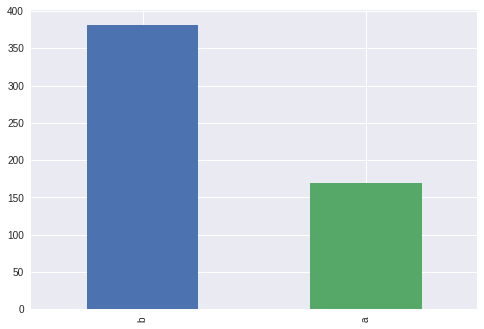

In [13]:
m.drawDistribution('A')

Drawing Distribution of Column D :
AxesSubplot(0.125,0.125;0.775x0.755)
---------------------------------------------


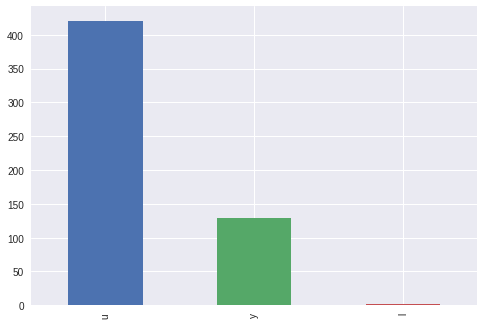

In [14]:
m.drawDistribution('D')

Drawing Distribution of Column E :
AxesSubplot(0.125,0.125;0.775x0.755)
---------------------------------------------


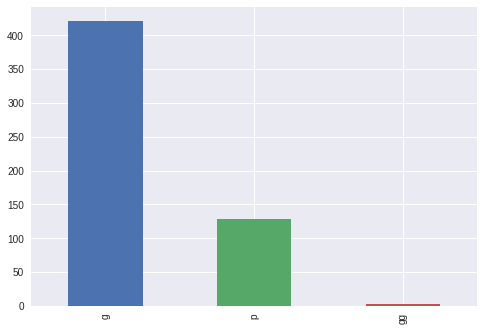

In [15]:
m.drawDistribution('E')

Drawing Distribution of Column F :
AxesSubplot(0.125,0.125;0.775x0.755)
---------------------------------------------


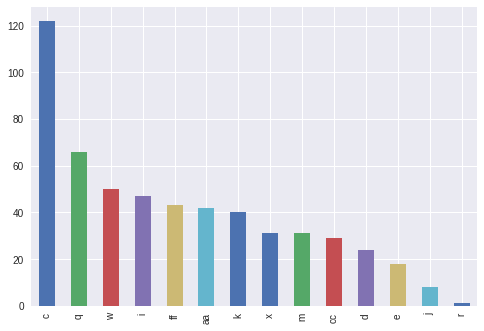

In [16]:
m.drawDistribution('F')

Drawing Distribution of Column G :
AxesSubplot(0.125,0.125;0.775x0.755)
---------------------------------------------


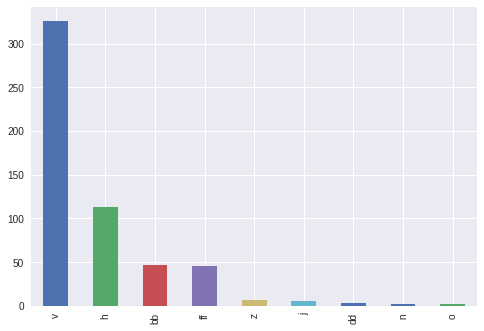

In [17]:
m.drawDistribution('G')

Drawing Distribution of Column I :
AxesSubplot(0.125,0.125;0.775x0.755)
---------------------------------------------


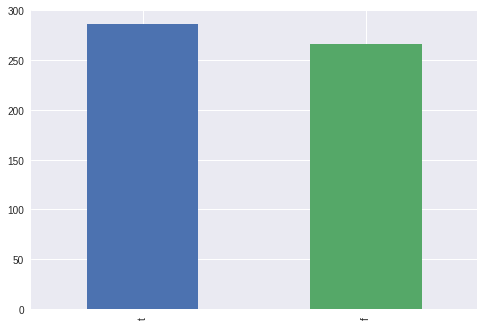

In [18]:
m.drawDistribution('I')

Drawing Distribution of Column J :
AxesSubplot(0.125,0.125;0.775x0.755)
---------------------------------------------


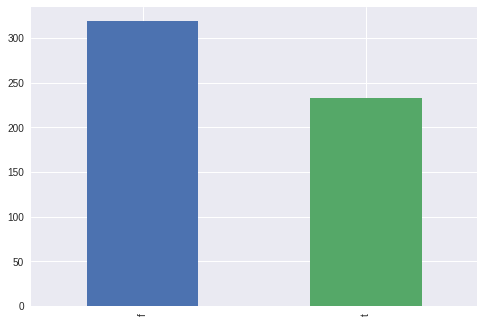

In [19]:
m.drawDistribution('J')

Drawing Distribution of Column K :
AxesSubplot(0.125,0.125;0.775x0.755)
---------------------------------------------


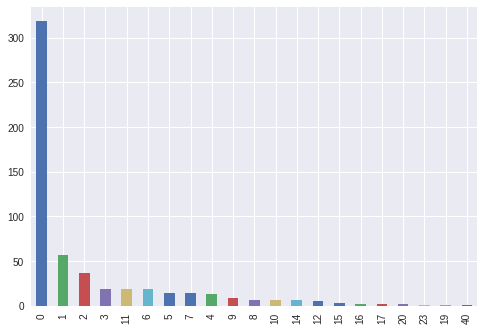

In [20]:
m.drawDistribution('K')

Drawing Distribution of Column P :
AxesSubplot(0.125,0.125;0.775x0.755)
---------------------------------------------


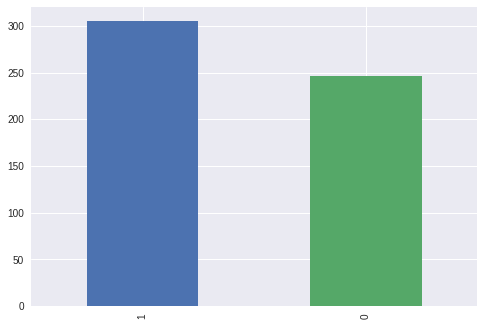

In [21]:
m.drawDistribution('P')

In [22]:
dataset = m.getDataSet()
dataset.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


In [0]:
X = dataset.iloc[:, 1:16].values
y = dataset.iloc[:, 16].values

In [24]:
X

array([['b', 18.42, 10.415, ..., 'g', 120.0, 375],
       ['a', 21.75, 11.75, ..., 'g', 180.0, 0],
       ['b', 30.17, 1.085, ..., 'g', 170.0, 179],
       ...,
       ['a', 41.33, 1.0, ..., 'g', 0.0, 300],
       ['a', 30.42, 1.375, ..., 'g', 0.0, 33],
       ['b', 47.17, 5.835, ..., 'g', 465.0, 150]], dtype=object)

In [25]:
X[:,0] = m.LabelEncoder(X[:,0])
X[:,3] = m.LabelEncoder(X[:,3])
X[:,4] = m.LabelEncoder(X[:,4])
X[:,5] = m.LabelEncoder(X[:,5])
X[:,6] = m.LabelEncoder(X[:,6])
X[:,8] = m.LabelEncoder(X[:,8])
X[:,9] = m.LabelEncoder(X[:,9])
X[:,11] = m.LabelEncoder(X[:,11])
X[:,12] = m.LabelEncoder(X[:,12])

Label Encoding Starts :
Classes : 
['a' 'b']
---------------------------------------------
Label Encoding Starts :
Classes : 
['l' 'u' 'y']
---------------------------------------------
Label Encoding Starts :
Classes : 
['g' 'gg' 'p']
---------------------------------------------
Label Encoding Starts :
Classes : 
['aa' 'c' 'cc' 'd' 'e' 'ff' 'i' 'j' 'k' 'm' 'q' 'r' 'w' 'x']
---------------------------------------------
Label Encoding Starts :
Classes : 
['bb' 'dd' 'ff' 'h' 'j' 'n' 'o' 'v' 'z']
---------------------------------------------
Label Encoding Starts :
Classes : 
['f' 't']
---------------------------------------------
Label Encoding Starts :
Classes : 
['f' 't']
---------------------------------------------
Label Encoding Starts :
Classes : 
['f' 't']
---------------------------------------------
Label Encoding Starts :
Classes : 
['g' 'p' 's']
---------------------------------------------


In [26]:
X

array([[1, 18.42, 10.415, ..., 0, 120.0, 375],
       [0, 21.75, 11.75, ..., 0, 180.0, 0],
       [1, 30.17, 1.085, ..., 0, 170.0, 179],
       ...,
       [0, 41.33, 1.0, ..., 0, 0.0, 300],
       [0, 30.42, 1.375, ..., 0, 0.0, 33],
       [1, 47.17, 5.835, ..., 0, 465.0, 150]], dtype=object)

In [27]:
X = m.FillNAImputer('mean' , X)

Done !


In [28]:
X

array([[  1.   ,  18.42 ,  10.415, ...,   0.   , 120.   , 375.   ],
       [  0.   ,  21.75 ,  11.75 , ...,   0.   , 180.   ,   0.   ],
       [  1.   ,  30.17 ,   1.085, ...,   0.   , 170.   , 179.   ],
       ...,
       [  0.   ,  41.33 ,   1.   , ...,   0.   ,   0.   , 300.   ],
       [  0.   ,  30.42 ,   1.375, ...,   0.   ,   0.   ,  33.   ],
       [  1.   ,  47.17 ,   5.835, ...,   0.   , 465.   , 150.   ]])

In [29]:
X_train , X_test , y_train , y_test = m.traintestSplit(X,y)

Test Size : 0.2 Random State : 0
Done!!


In [30]:
len(X_train)

441

In [31]:
## Neural Network

model_nn , y_pred_nn = m.NeuralNetwork(X_train,y_train,X_test,y_test,16,100)

Model Initialized :)
Successfully Compiled
Model Summary 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None
Batch Size : 16 Epochs : 100
Epoch 1/100
441/441 [==============================] - 1s 3ms/step - loss: 0.6739 - acc: 0.5283
Epoch 2/100
441/441 [==============================] - 0s 377us/step - loss: 0.6500 - acc: 0.6803
Epoch 3/100
441/441 [==============================] - 0s 424us/step - loss: 0.6428 - acc: 0.6939
Epoch 4/100
441/441 [==

441/441 [==============================] - 0s 455us/step - loss: 0.6239 - acc: 0.7052
Epoch 13/100
441/441 [==============================] - 0s 448us/step - loss: 0.6179 - acc: 0.7120
Epoch 14/100
441/441 [==============================] - 0s 432us/step - loss: 0.6138 - acc: 0.7098
Epoch 15/100
441/441 [==============================] - 0s 460us/step - loss: 0.6134 - acc: 0.7029
Epoch 16/100
441/441 [==============================] - 0s 431us/step - loss: 0.6144 - acc: 0.7211
Epoch 17/100
441/441 [==============================] - 0s 439us/step - loss: 0.5977 - acc: 0.7279
Epoch 18/100
441/441 [==============================] - 0s 442us/step - loss: 0.5965 - acc: 0.7370
Epoch 19/100
441/441 [==============================] - 0s 463us/step - loss: 0.5809 - acc: 0.7392
Epoch 20/100
441/441 [==============================] - 0s 437us/step - loss: 0.5754 - acc: 0.7324
Epoch 21/100
441/441 [==============================] - 0s 437us/step - loss: 0.5662 - acc: 0.7506
Epoch 22/100
441/441 [=

Epoch 30/100
441/441 [==============================] - 0s 434us/step - loss: 0.4945 - acc: 0.8005
Epoch 31/100
441/441 [==============================] - 0s 455us/step - loss: 0.5156 - acc: 0.7914
Epoch 32/100
441/441 [==============================] - 0s 444us/step - loss: 0.4875 - acc: 0.8073
Epoch 33/100
441/441 [==============================] - 0s 441us/step - loss: 0.5575 - acc: 0.7982
Epoch 34/100
441/441 [==============================] - 0s 431us/step - loss: 0.6771 - acc: 0.7483
Epoch 35/100
441/441 [==============================] - 0s 431us/step - loss: 0.5231 - acc: 0.7732
Epoch 36/100
441/441 [==============================] - 0s 433us/step - loss: 0.4931 - acc: 0.7937
Epoch 37/100
441/441 [==============================] - 0s 429us/step - loss: 0.4783 - acc: 0.8005
Epoch 38/100
441/441 [==============================] - 0s 431us/step - loss: 0.5022 - acc: 0.7982
Epoch 39/100
441/441 [==============================] - 0s 444us/step - loss: 0.4989 - acc: 0.7937
Epoch 40/1

441/441 [==============================] - 0s 419us/step - loss: 0.4409 - acc: 0.8005
Epoch 49/100
441/441 [==============================] - 0s 449us/step - loss: 0.4375 - acc: 0.8050
Epoch 50/100
441/441 [==============================] - 0s 423us/step - loss: 0.4341 - acc: 0.8005
Epoch 51/100
441/441 [==============================] - 0s 438us/step - loss: 0.4297 - acc: 0.8073
Epoch 52/100
441/441 [==============================] - 0s 453us/step - loss: 0.4262 - acc: 0.8005
Epoch 53/100
441/441 [==============================] - 0s 445us/step - loss: 0.4244 - acc: 0.8095
Epoch 54/100
441/441 [==============================] - 0s 443us/step - loss: 0.4302 - acc: 0.8050
Epoch 55/100
441/441 [==============================] - 0s 438us/step - loss: 0.4220 - acc: 0.8186
Epoch 56/100
441/441 [==============================] - 0s 432us/step - loss: 0.4180 - acc: 0.8186
Epoch 57/100
441/441 [==============================] - 0s 458us/step - loss: 0.4272 - acc: 0.8209
Epoch 58/100
441/441 [=

441/441 [==============================] - 0s 428us/step - loss: 0.4884 - acc: 0.8073
Epoch 67/100
441/441 [==============================] - 0s 436us/step - loss: 0.4089 - acc: 0.8277
Epoch 68/100
441/441 [==============================] - 0s 415us/step - loss: 0.4054 - acc: 0.8209
Epoch 69/100
441/441 [==============================] - 0s 431us/step - loss: 0.4166 - acc: 0.8118
Epoch 70/100
441/441 [==============================] - 0s 452us/step - loss: 0.3980 - acc: 0.8254
Epoch 71/100
441/441 [==============================] - 0s 423us/step - loss: 0.4159 - acc: 0.8050
Epoch 72/100
441/441 [==============================] - 0s 448us/step - loss: 0.3990 - acc: 0.8277
Epoch 73/100
441/441 [==============================] - 0s 427us/step - loss: 0.3927 - acc: 0.8141
Epoch 74/100
441/441 [==============================] - 0s 448us/step - loss: 0.3869 - acc: 0.8413
Epoch 75/100
441/441 [==============================] - 0s 430us/step - loss: 0.4440 - acc: 0.8005
Epoch 76/100
441/441 [=

441/441 [==============================] - 0s 410us/step - loss: 0.3834 - acc: 0.8277
Epoch 85/100
441/441 [==============================] - 0s 411us/step - loss: 0.3842 - acc: 0.8299
Epoch 86/100
441/441 [==============================] - 0s 456us/step - loss: 0.3789 - acc: 0.8345
Epoch 87/100
441/441 [==============================] - 0s 444us/step - loss: 0.3814 - acc: 0.8277
Epoch 88/100
441/441 [==============================] - 0s 437us/step - loss: 0.3736 - acc: 0.8435
Epoch 89/100
441/441 [==============================] - 0s 423us/step - loss: 0.3825 - acc: 0.8299
Epoch 90/100
441/441 [==============================] - 0s 433us/step - loss: 0.3744 - acc: 0.8299
Epoch 91/100
441/441 [==============================] - 0s 446us/step - loss: 0.4438 - acc: 0.8254
Epoch 92/100
441/441 [==============================] - 0s 424us/step - loss: 0.4135 - acc: 0.8073
Epoch 93/100
441/441 [==============================] - 0s 459us/step - loss: 0.3761 - acc: 0.8322
Epoch 94/100
441/441 [=

In [32]:
# XGBoost

classifier_xg = m.XGBoost(X_train , y_train,max_depth = 6 , n_estimators = 500)
y_xg = m.CheckAccuracy(X_test,y_test)

Done!!
[[37  4]
 [10 60]]
Accuracy : 
87.3873873874
--------------------------------------------------


/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
## SVM

classifier_svm = m.SVM(X_train,y_train,'linear',0)
y_svm = m.CheckAccuracy(X_test,y_test)

Done !!
[[40  1]
 [15 55]]
Accuracy : 
85.5855855856
--------------------------------------------------


In [0]:
y_pred = y_xg+y_svm

In [41]:
y_pred

array([0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1,
       1, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 0,
       0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0])

In [0]:
y_pred = y_pred/2.0

In [0]:
y_pred = y_pred>=0.5

In [44]:
m.ConfusionMatrix(y_test , y_pred)

Confusion Matrix : 
[[37  4]
 [ 9 61]]
Accuracy : 88


In [45]:
# Gaussian Naive Bayes

m.GaussianNB(X_train,y_train)
y_gauss = m.CheckAccuracy(X_test,y_test)

Done !!
[[25 16]
 [ 9 61]]
Accuracy : 
77.4774774775
--------------------------------------------------


In [0]:
test = pd.read_csv('./dataset/test.csv')

In [47]:
test.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,553,b,29.17,3.500,u,g,w,v,3.500,t,t,3,t,g,329.0,0
1,554,b,28.33,5.000,u,g,w,v,11.000,t,f,0,t,g,70.0,0
2,555,b,29.25,14.790,u,g,aa,v,5.040,t,t,5,t,g,168.0,0
3,556,a,44.17,6.665,u,g,q,v,7.375,t,t,3,t,g,0.0,0
4,557,b,18.08,5.500,u,g,k,v,0.500,t,f,0,f,g,80.0,0


In [48]:
m1 = MachineLearning(test)
m1.FillNA('A' , 'b')
m1.FillNA('D' , 'u')
m1.FillNA('E' , 'g')
m1.FillNA('F' , 'c')
m1.FillNA('G' , 'v')
dataset1 = m1.getDataSet()
X = dataset1.iloc[:, 1:16].values
X[:,0] = m1.LabelEncoder(X[:,0])
X[:,3] = m1.LabelEncoder(X[:,3])
X[:,4] = m1.LabelEncoder(X[:,4])
X[:,5] = m1.LabelEncoder(X[:,5])
X[:,6] = m1.LabelEncoder(X[:,6])
X[:,8] = m1.LabelEncoder(X[:,8])
X[:,9] = m1.LabelEncoder(X[:,9])
X[:,11] = m1.LabelEncoder(X[:,11])
X[:,12] = m1.LabelEncoder(X[:,12])
X = m.FillNAImputer('mean' , X)
X

Functions : 
----------------------------------------------------
For taking the updated dataset        : getDataSet()
----------------------------------------------------
For Checking Null Percentage          : checkCounts()
----------------------------------------------------
For checking Null Values              : checkNull()
----------------------------------------------------
For Getting Out Unique Values         : uniqueValues(column)
----------------------------------------------------
For drawing bargraph distribution     : drawDistribution(column)
----------------------------------------------------
Label Encoding                        : LabelEncoder(X)
----------------------------------------------------
Filling Null Values without Imputer   : FillNA(cols , filling_data)
----------------------------------------------------
Filling Null Values with Imputer      : FillNAImputer(strategy , X)
----------------------------------------------------
Train and Test Splitting         

array([[1.0000e+00, 2.9170e+01, 3.5000e+00, ..., 0.0000e+00, 3.2900e+02,
        0.0000e+00],
       [1.0000e+00, 2.8330e+01, 5.0000e+00, ..., 0.0000e+00, 7.0000e+01,
        0.0000e+00],
       [1.0000e+00, 2.9250e+01, 1.4790e+01, ..., 0.0000e+00, 1.6800e+02,
        0.0000e+00],
       ...,
       [1.0000e+00, 3.9250e+01, 9.5000e+00, ..., 0.0000e+00, 2.4000e+02,
        4.6070e+03],
       [1.0000e+00, 4.1920e+01, 4.2000e-01, ..., 0.0000e+00, 2.2000e+02,
        9.4800e+02],
       [0.0000e+00, 2.0500e+01, 1.1835e+01, ..., 0.0000e+00, 3.4000e+02,
        0.0000e+00]])

In [49]:
y_test_xg = classifier_xg.predict(X)
y_test_svm = classifier_svm.predict(X)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
y_test = (y_test_xg + y_test_svm)/2.0

In [0]:
y_test = [1 if i>=0.5 else 0 for i in y_test]

In [0]:
df = pd.DataFrame()
df['id'] = test['id']
df['P'] = y_test

In [53]:
df.head()

,id,P
0,553,0
1,554,0
2,555,0
3,556,0
4,557,0


In [0]:
df.to_csv('SubmissionFile1.csv' , index = False)

In [0]:
helper.downloadFile('./SubmissionFile1.csv')

# End